# Movies of Nikurashin and Legg on a slope

In [1]:
import xarray as xr
import numpy as np
import xgcm
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 16

import warnings
warnings.filterwarnings('ignore', '.*FutureWarning*.')
warnings.filterwarnings('ignore', '.*.')

div_cmap = plt.get_cmap('RdBu_r')
div_cmap.set_bad(color=(0.8,0.8,0.8))

cmap = plt.get_cmap('viridis')
cmap.set_bad(color=(0.8,0.8,0.8))

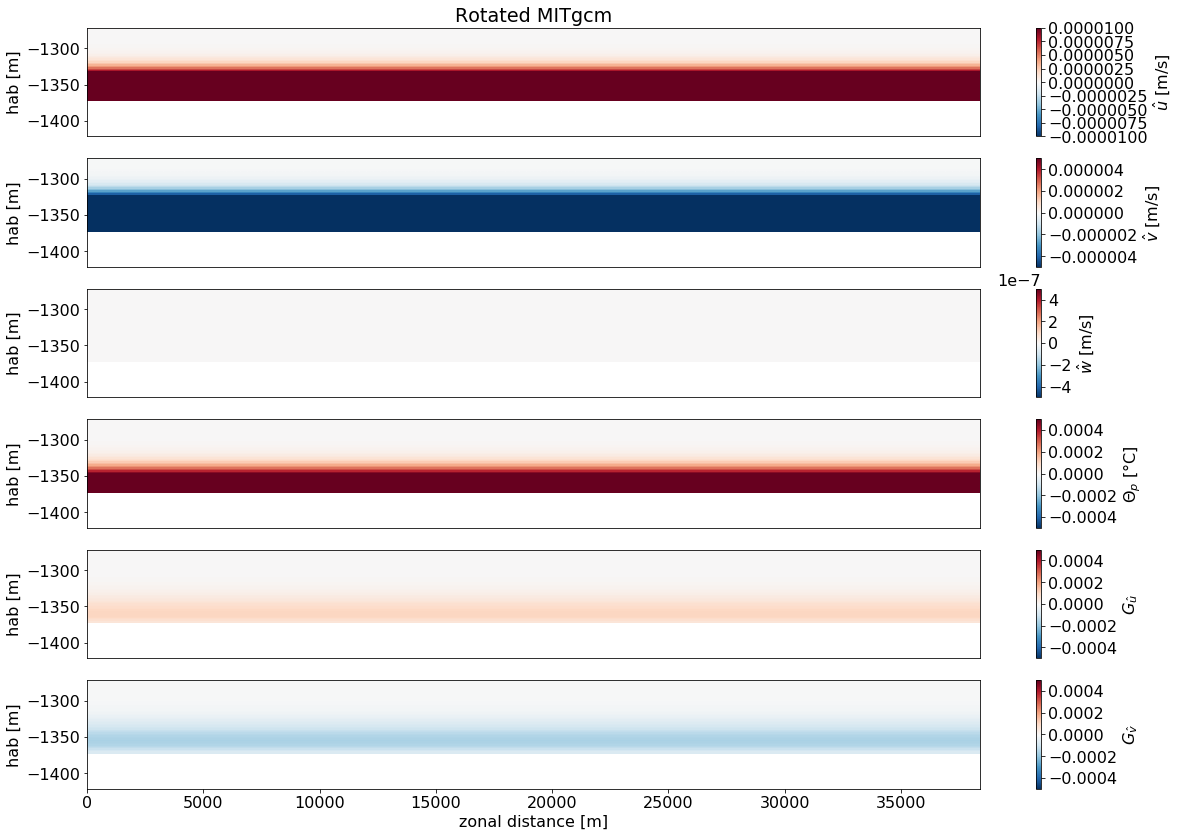

In [4]:
Iter0 = 805 #Iter0 = 105
data_dir = "/nobackup1/hdrake/mitgcm_static/TurbulentCirculation/rotated_setups/replicate_Callies_2018/run"
ds = open_mdsdataset(data_dir,iters=[Iter0],ignore_unknown_vars=True,prefix=["standardDiag","Diag"])
dsog = ds
ds['time'] = ds['time']*60 # convert from iterations to seconds
grid = xgcm.Grid(ds, periodic=['X','Y'])

coords = ds.coords.to_dataset().reset_coords()
ds = ds.reset_coords(drop=True)
coords['dV'] = coords['rA']*(coords['drF']*coords['hFacC'])

Hz = -np.min(ds['Z'])

plt.figure(figsize=(20,14))

plt.subplot(6,1,1)
q = ds['UVEL'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
q.set_clim([-1e-5,1e-5])
plt.title('Rotated MITgcm')
plt.ylim([-Hz-50,-Hz+100])
plt.ylabel('hab [m]')
plt.xlabel('')
plt.xticks([])
q.colorbar.set_label(r'$\hat{u}$ [m/s]')

plt.subplot(6,1,2)
q = ds['VVEL'].sel(YG=coords['YG'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-6,5e-6])
plt.ylim([-Hz-50,-Hz+100])
plt.ylabel('hab [m]')
plt.xlabel('')
plt.xticks([])
q.colorbar.set_label(r'$\hat{v}$ [m/s]')

plt.subplot(6,1,3)
q = ds['WVEL'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-7,5e-7])
plt.ylim([-Hz-50,-Hz+100])
plt.ylabel('hab [m]')
plt.xlabel('')
plt.xticks([])
q.colorbar.set_label(r'$\hat{w}$ [m/s]')

plt.subplot(6,1,4)
q = ds['THETA'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-4,5e-4])
plt.ylim([-Hz-50,-Hz+100])
plt.ylabel('hab [m]')
plt.xlabel('')
plt.xticks([])
q.colorbar.set_label(r'$\Theta_{p}$ [$\degree$C]')

plt.subplot(6,1,5)
q = ds['TOTUTEND'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-4,5e-4])
plt.ylim([-Hz-50,-Hz+100])
plt.ylabel('hab [m]')
plt.xlabel('')
plt.xticks([])
q.colorbar.set_label(r'$G_{\hat{u}}$')

plt.subplot(6,1,6)
q = ds['TOTVTEND'].sel(YG=coords['YG'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-4,5e-4])
plt.ylim([-Hz-50,-Hz+100])
plt.ylabel('hab [m]')
plt.xlabel('zonal distance [m]')
q.colorbar.set_label(r'$G_{\hat{v}}$')